In [27]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [2]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv")
df.head(2)

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price
0,2529604,2019-04-28,Category5,267,30011006,612,IRQ,750,3334.8225
1,2529605,2019-04-29,Category5,302,30011006,514,BHR,400,3032.8240


In [3]:
#Filter data for regression
df_reg=df[["QTY","Total Price"]]

In [4]:
#Checking if we have missing data
df_reg.isnull().sum()

QTY            0
Total Price    0
dtype: int64

In [9]:
#Split data into X and y with reshape function
X = df_reg["QTY"].to_numpy().reshape(-1, 1)
y = df_reg["Total Price"].to_numpy().reshape(-1, 1)

In [10]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# Create and fit XGBoost regressor model
xgbr = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=100, random_state=42)
xgbr.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
y_pred = xgbr.predict(X_test)

C:\Users\piotr\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [25]:
# Compute the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_pred)
mae

1313.947236896194

In [29]:
#Define a size
plt.rcParams["figure.figsize"] = (12, 8)

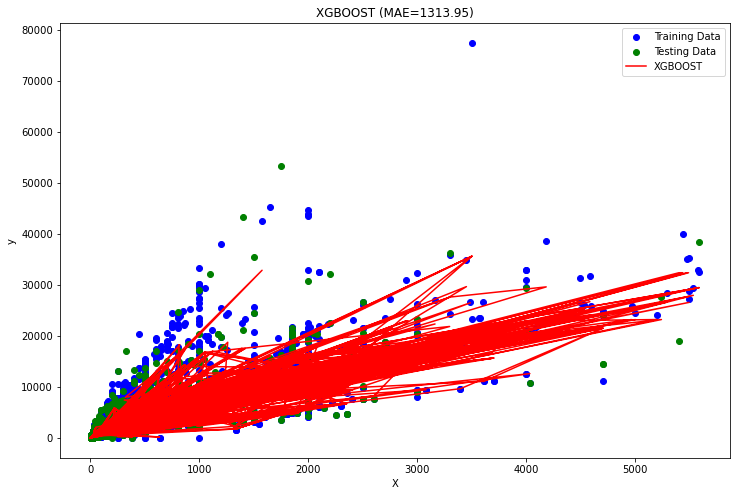

In [30]:
# Plot the training and testing data as well as the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X, xgbr.predict(X), color='red', label='XGBOOST')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'XGBOOST (MAE={mae:.2f})')
plt.legend()
plt.show()